<a href="https://colab.research.google.com/github/vrushabhmudda/Deep-Learning-project/blob/main/Copy_of_ISM6561_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISM 6561 - Final Project

#Kaggle Competition: ISIC 2024 - Skin Cancer Detection with 3D-TBP

##A Classification Model for Determining Whether a Skin Lesion is Malignant or Benign

##Team Members:

*  Marta Falceto Font
*  Nairi Keeney
*  Vrushabh Mudda


## Index

- [Part 1: Environmental Set Up](#scrollTo=nOSRhHZgqTr_)
  - [1. Unzipping Files](#scrollTo=kX5q3NjXYGDd)
  - [2. Load Data](#scrollTo=DRz5S1d_aM-f)

- [Part 2: Initial Exploratory Data Analysis and Data Prep](#scrollTo=_3GKxUc95LPE)
  - [1. Train / Validation split](####-2.1-Train-/-Validation-Split)
  - [2. Train / Validation Exploratory Data Analysis](####-2.1.1-Train-/-Validation-Exploratory-Data-Analysis)
    - [1. Train / Validation Class Distribution](#####-2.2.1-Train-/-Validation-Class-Distribution)
    - [2. Train / Validation Distribution on Graphs](#####-2.2.2-Train-/-Validation-Distribution-on-Graphs)
    - [3. Visualization of Train / Validation Sets](#####-2.2.3-Visualization-of-Train-/-Validation-Sets)

- [Part 3. Creating Test Split](###-3.-Creating-Test-Split)
  - [1. Test Set Exploratory Data Analysis](####-3.1-Test-Set-Exploratory-Data-Analysis)
    - [1.1 Viewing Files and Their Shapes within Test Set](#####-3.1.1-Viewing-Files-and-Their-Shapes-within-Test-Set)
    - [1.2 Visualizing Test Set](#####-3.1.2-Visualizing-Test-Set)

- [Part 4. Preprocessing Pipelines](###-4.-Preprocessing-Pipelines)
  - [1. Preprocessing Pipeline for Training / Validation Set](###-4.1-Preprocessing-Pipeline-for-Training-/-Validation-Set)
    - [1.1 Verifying Training Pipeline](####-4.1.1-Verifying-Training-Pipeline)
    - [1.2 Verifying Validation Pipeline](####-4.1.2-Verifying-Validation-Pipeline)
  - [2. Preprocessing Pipeline for Test Set](###-4.2-Preprocessing-Pipeline-for-Test-Set)
    - [2.1 Verifying Test Pipeline](####-4.2.1-Verifying-Test-Pipeline)

- [Part 5. Baseline CNN Model](###-5.-Baseline-CNN-Model)
  - [1. Evaluation and Plots](####-5.1-Evaluation-&-Plots)

- [Part 6. Transfer Learning Models](###-6.-Transfer-Learning-Models)
  - [1. Evaluation and Plots](####-6.1-Evaluation-&-Plots)

- [Part 7. Grad-CAM Explainability](###-7.-Grad-CAM-Explainability)

### 1. Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
# if requires remounting
from google.colab import drive
drive.mount('/content/drive', forced_remount=True)

####1.1 Unzipping Files

In [ ]:
from google.colab import drive
import zipfile
import os


# Extract zip directly in Drive (you already have it at /content/isic-2024-challenge.zip)
zip_path = '/content/isic-2024-challenge.zip'
extract_to = '/content/drive/MyDrive/ISIC2024/data/raw/'

# Create folder
os.makedirs(extract_to, exist_ok=True)

# Extract
print("Extracting... this will take 10-15 minutes")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✓ Extraction complete!")
!ls /content/drive/MyDrive/ISIC2024/data/raw/



Extracting... this will take 10-15 minutes
✓ Extraction complete!
sample_submission.csv  test-metadata.csv  train-image	    train-metadata.csv
test-image.hdf5        train		  train-image.hdf5


#### 1.2 Load Data

In [ ]:
# Create local working directories
!mkdir -p /content/data/processed
!mkdir -p /content/models
!mkdir -p /content/results

# Copy metadata CSV to local (small file, fast)
!cp /content/drive/MyDrive/ISIC2024/data/raw/train-metadata.csv /content/data/
!cp /content/drive/MyDrive/ISIC2024/data/raw/test-metadata.csv /content/data/

# Load images DIRECTLY from Drive, but save everything else locally
train_image_dir = '/content/drive/MyDrive/ISIC2024/data/raw/train-image/image/'
test_image_dir = '/content/drive/MyDrive/ISIC2024/data/raw/test-image/image/'

print("✓ Setup complete - reading images from Drive, saving work locally")


✓ Setup complete - reading images from Drive, saving work locally


### 2. Initial Data Prep & Preprocessing

/tmp/ipython-input-1314104690.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/data/train-metadata.csv')


Dataset shape: (401059, 55)

Columns: ['isic_id', 'target', 'patient_id', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']

First 5 rows:
    

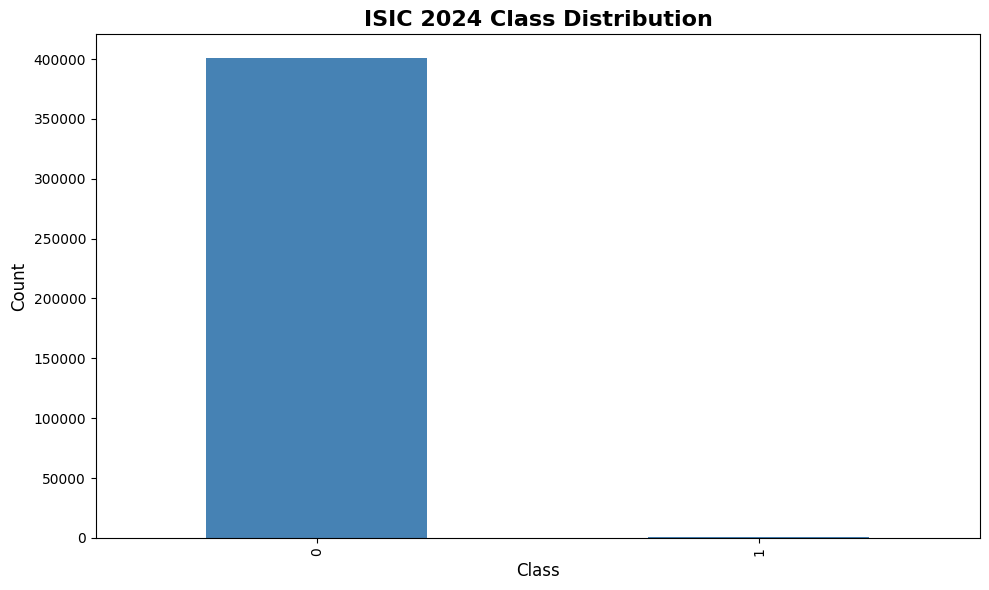


⚠️ Class imbalance ratio: 1019.51:1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load metadata
train_df = pd.read_csv('/content/data/train-metadata.csv')

print(f"Dataset shape: {train_df.shape}")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(train_df.head())

# Class distribution
print(f"\n✓ Target distribution:")
print(train_df['target'].value_counts())

# Plot class distribution
plt.figure(figsize=(10, 6))
train_df['target'].value_counts().plot(kind='bar', color='steelblue')
plt.title('ISIC 2024 Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('/content/results/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Check for class imbalance
class_counts = train_df['target'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\n⚠️ Class imbalance ratio: {imbalance_ratio:.2f}:1")



Malignant vs Benign

In [ ]:
malignant_count = train_df[train_df['target'] == 1].shape[0]
benign_count = train_df[train_df['target'] == 0].shape[0]

print("Malignant images:", malignant_count)
print("Benign images:", benign_count)


Malignant images: 393
Benign images: 400666


Sampling few random images

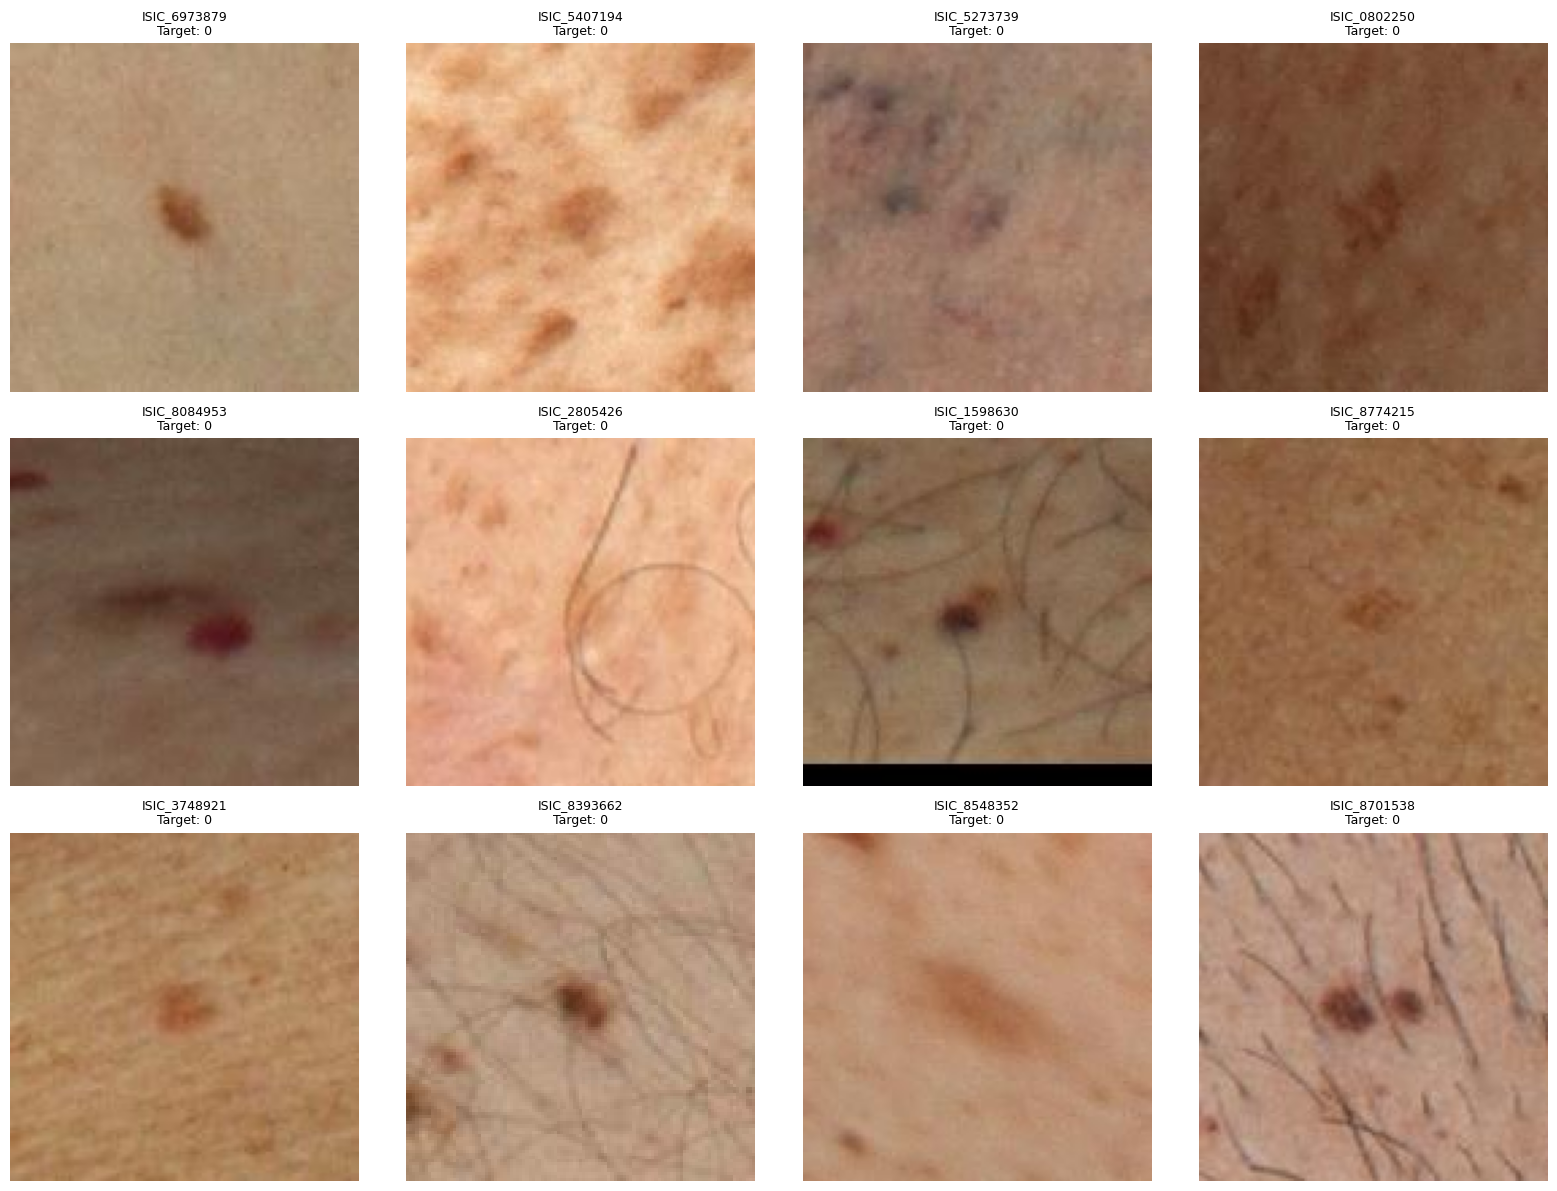

✓ Sample images loaded successfully


In [ ]:
import cv2
import random

# Sample random images
sample_df = train_df.sample(12, random_state=42)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, (_, row) in enumerate(sample_df.iterrows()):
    img_path = f"{train_image_dir}{row['isic_id']}.jpg"

    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{row['isic_id']}\nTarget: {row['target']}", fontsize=9)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, 'Image not found', ha='center', va='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('/content/results/sample_images.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Sample images loaded successfully")






Finding Nulls

In [ ]:
print(train_df.isnull().sum())


isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

##Pre-processing meta data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ============================================================================
# FUNCTION 1: BALANCE DATASET
# ============================================================================

def balance_dataset(train_df, strategy='undersample', ratio=20):
    """Balance the dataset"""
    print("\n" + "=" * 60)
    print("CLASS BALANCING")
    print("=" * 60)

    df_majority = train_df[train_df['target'] == 0]
    df_minority = train_df[train_df['target'] == 1]

    print(f"\nOriginal distribution:")
    print(f"  Class 0 (benign): {len(df_majority):,}")
    print(f"  Class 1 (malignant): {len(df_minority):,}")
    print(f"  Imbalance ratio: {len(df_majority)/len(df_minority):.1f}:1")

    if strategy == 'undersample':
        n_samples = len(df_minority) * ratio
        df_majority_resampled = resample(
            df_majority,
            replace=False,
            n_samples=n_samples,
            random_state=42
        )
        df_balanced = pd.concat([df_majority_resampled, df_minority])
    elif strategy == 'oversample':
        n_samples = len(df_majority) // ratio
        df_minority_resampled = resample(
            df_minority,
            replace=True,
            n_samples=n_samples,
            random_state=42
        )
        df_balanced = pd.concat([df_majority, df_minority_resampled])

    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"\nBalanced distribution:")
    print(f"  Class 0 (benign): {len(df_balanced[df_balanced['target']==0]):,}")
    print(f"  Class 1 (malignant): {len(df_balanced[df_balanced['target']==1]):,}")
    print(f"  New ratio: {len(df_balanced[df_balanced['target']==0])/len(df_balanced[df_balanced['target']==1]):.1f}:1")

    return df_balanced


# ============================================================================
# FUNCTION 2: PREPROCESS METADATA
# ============================================================================

def preprocess_metadata(train_df):
    """Preprocess metadata features"""
    print("=" * 60)
    print("METADATA PREPROCESSING")
    print("=" * 60)

    df = train_df.copy()

    print("\n1. Encoding categorical variables...")

    # Sex
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df.loc[df['sex'].isna(), 'sex'] = 0.5

    # Anatomical site - one-hot encoding
    anatom_dummies = pd.get_dummies(df['anatom_site_general'], prefix='anatom', dummy_na=True)
    df = pd.concat([df, anatom_dummies], axis=1)

    # Image type - one-hot encoding
    image_type_dummies = pd.get_dummies(df['image_type'], prefix='img_type', dummy_na=True)
    df = pd.concat([df, image_type_dummies], axis=1)

    # TBP tile type - one-hot encoding
    tbp_type_dummies = pd.get_dummies(df['tbp_tile_type'], prefix='tbp_type', dummy_na=True)
    df = pd.concat([df, tbp_type_dummies], axis=1)

    print(f"   ✓ Categorical variables encoded")

    print("\n2. Processing numerical features...")

    numerical_features = [
        'age_approx', 'clin_size_long_diam_mm',
        'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
        'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext',
        'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
        'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
        'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL',
        'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity',
        'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
        'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
        'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
        'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
        'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z',
        'tbp_lv_dnn_lesion_confidence'
    ]

    numerical_features = [f for f in numerical_features if f in df.columns]

    # Impute and scale
    imputer = SimpleImputer(strategy='median')
    df[numerical_features] = imputer.fit_transform(df[numerical_features])

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    print(f"   ✓ {len(numerical_features)} numerical features imputed")
    print(f"   ✓ Numerical features standardized (mean=0, std=1)")

    metadata_features = numerical_features + list(anatom_dummies.columns) + \
                       list(image_type_dummies.columns) + list(tbp_type_dummies.columns) + ['sex']

    print(f"\n✓ Total metadata features: {len(metadata_features)}")

    return df, metadata_features, scaler, imputer


# ============================================================================
# FUNCTION 3: CREATE IMAGE AUGMENTATION
# ============================================================================

def create_image_augmentation():
    """Create image augmentation pipeline"""
    train_augmentation = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.15,
        shear_range=0.1,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    val_augmentation = ImageDataGenerator(rescale=1./255)

    return train_augmentation, val_augmentation


# ============================================================================
# FUNCTION 4: GET CLASS WEIGHTS
# ============================================================================

def get_class_weights(y_train):
    """Calculate class weights"""
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    print("\n" + "=" * 60)
    print("CLASS WEIGHTS")
    print("=" * 60)
    print(f"Class 0 weight: {class_weight_dict[0]:.4f}")
    print(f"Class 1 weight: {class_weight_dict[1]:.4f}")

    return class_weight_dict


# ============================================================================
# FUNCTION 5: COMPLETE PIPELINE (FIXED VERSION WITH ALL FEATURES)
# ============================================================================

def complete_preprocessing_pipeline_v2(train_df, base_dir, balance_strategy='undersample'):
    """
    Complete preprocessing pipeline with automatic image directory detection

    This includes ALL functionality from original pipeline PLUS fixes:
    - Automatic image directory detection
    - Fixed file path handling
    - Image existence verification
    - Better error messages
    """
    print("\n" + "=" * 60)
    print("STARTING COMPLETE PREPROCESSING PIPELINE V2")
    print("=" * 60)

    # STEP 0: Find correct image directory (NEW - FIX FOR PATH ISSUES)
    print("\n🔍 Searching for image directory...")
    possible_dirs = [
        base_dir + 'train-image/image/',
        base_dir + 'train-image/',
        base_dir + 'train/',
        base_dir + 'image/',
        base_dir
    ]

    image_dir = None
    for d in possible_dirs:
        if os.path.exists(d):
            files = os.listdir(d)
            jpg_files = [f for f in files if f.endswith('.jpg') and f.startswith('ISIC_')]
            if len(jpg_files) > 0:
                image_dir = d
                print(f"✓ Found {len(jpg_files)} images in: {d}")
                break

    if image_dir is None:
        raise ValueError("Could not find image directory with ISIC images!")

    # STEP 1: Balance dataset (SAME AS ORIGINAL)
    train_df_balanced = balance_dataset(train_df, strategy=balance_strategy, ratio=20)

    # STEP 2: Preprocess metadata (SAME AS ORIGINAL)
    train_df_processed, metadata_features, scaler, imputer = preprocess_metadata(train_df_balanced)

    # STEP 3: Convert target to string (FIX FOR KERAS)
    train_df_processed['target'] = train_df_processed['target'].astype(str)

    # STEP 4: Create filename column (NEW - FIX FOR PATH ISSUES)
    train_df_processed['filename'] = train_df_processed['isic_id'] + '.jpg'

    # STEP 5: Verify images exist (NEW - QUALITY CHECK)
    print("\n🔍 Verifying sample images exist...")
    sample_ids = train_df_processed['isic_id'].head(5).values
    found_count = 0
    for img_id in sample_ids:
        img_path = os.path.join(image_dir, f"{img_id}.jpg")
        if os.path.exists(img_path):
            found_count += 1
    print(f"✓ Found {found_count}/5 sample images")

    if found_count == 0:
        print("❌ ERROR: Cannot find images. Listing directory contents:")
        print(os.listdir(image_dir)[:10])
        return None

    # STEP 6: Split train/val (SAME AS ORIGINAL)
    train_df_split, val_df = train_test_split(
        train_df_processed,
        test_size=0.2,
        stratify=train_df_processed['target'],
        random_state=42
    )

    print(f"\n✓ Train set: {len(train_df_split)} samples")
    print(f"✓ Validation set: {len(val_df)} samples")

    # STEP 7: Create image generators (SAME AS ORIGINAL BUT USES 'filename' COLUMN)
    train_datagen, val_datagen = create_image_augmentation()

    train_generator = train_datagen.flow_from_dataframe(
        train_df_split,
        directory=image_dir,
        x_col='filename',  # FIXED: Use pre-created filename column
        y_col='target',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    val_generator = val_datagen.flow_from_dataframe(
        val_df,
        directory=image_dir,
        x_col='filename',  # FIXED: Use pre-created filename column
        y_col='target',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # STEP 8: Calculate class weights (SAME AS ORIGINAL)
    train_df_numeric = train_df_split.copy()
    train_df_numeric['target'] = train_df_numeric['target'].astype(int)
    class_weights = get_class_weights(train_df_numeric['target'].values)

    print("\n" + "=" * 60)
    print("PREPROCESSING COMPLETE!")
    print("=" * 60)
    print(f"✓ Train batches: {len(train_generator)}")
    print(f"✓ Val batches: {len(val_generator)}")

    return {
        'train_df': train_df_split,
        'val_df': val_df,
        'train_generator': train_generator,
        'val_generator': val_generator,
        'metadata_features': metadata_features,
        'class_weights': class_weights,
        'scaler': scaler,
        'imputer': imputer,
        'image_dir': image_dir
    }


# ============================================================================
# RUN THE COMPLETE PIPELINE
# ============================================================================

train_df = pd.read_csv('/content/data/train-metadata.csv')
base_dir = '/content/drive/MyDrive/ISIC2024/data/raw/'

preprocessed_data = complete_preprocessing_pipeline_v2(
    train_df=train_df,
    base_dir=base_dir,
    balance_strategy='undersample'
)

if preprocessed_data is not None:
    print(f"\n✅ ALL PREPROCESSING COMPLETE!")
    print(f"\nWhat you have:")
    print(f"  ✓ Balanced dataset (20:1 ratio)")
    print(f"  ✓ {len(preprocessed_data['metadata_features'])} metadata features (encoded, imputed, scaled)")
    print(f"  ✓ Image augmentation (rotation, flip, zoom, brightness)")
    print(f"  ✓ Class weights calculated ({preprocessed_data['class_weights']})")
    print(f"  ✓ {len(preprocessed_data['train_generator'])} train batches ready")
    print(f"  ✓ {len(preprocessed_data['val_generator'])} validation batches ready")

    # Test batch loading
    print("\n🧪 Testing batch loading...")
    test_batch_x, test_batch_y = next(preprocessed_data['train_generator'])
    print(f"✓ Batch loaded: {test_batch_x.shape}, labels: {test_batch_y.shape}")




/tmp/ipython-input-218081396.py:308: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/data/train-metadata.csv')



STARTING COMPLETE PREPROCESSING PIPELINE V2

🔍 Searching for image directory...
✓ Found 401059 images in: /content/drive/MyDrive/ISIC2024/data/raw/train-image/image/

CLASS BALANCING

Original distribution:
  Class 0 (benign): 400,666
  Class 1 (malignant): 393
  Imbalance ratio: 1019.5:1

Balanced distribution:
  Class 0 (benign): 7,860
  Class 1 (malignant): 393
  New ratio: 20.0:1
METADATA PREPROCESSING

1. Encoding categorical variables...
   ✓ Categorical variables encoded

2. Processing numerical features...
   ✓ 35 numerical features imputed
   ✓ Numerical features standardized (mean=0, std=1)

✓ Total metadata features: 47

🔍 Verifying sample images exist...
✓ Found 5/5 sample images

✓ Train set: 6602 samples
✓ Validation set: 1651 samples
Found 6602 validated image filenames belonging to 2 classes.
Found 1651 validated image filenames belonging to 2 classes.

CLASS WEIGHTS
Class 0 weight: 0.5250
Class 1 weight: 10.5127

PREPROCESSING COMPLETE!
✓ Train batches: 207
✓ Val batc

###Pipeline to pre-process the images

/tmp/ipython-input-2904749604.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['file_path'] = train_df['isic_id'].apply(lambda x: f"{data_dir}/{x}.jpg")


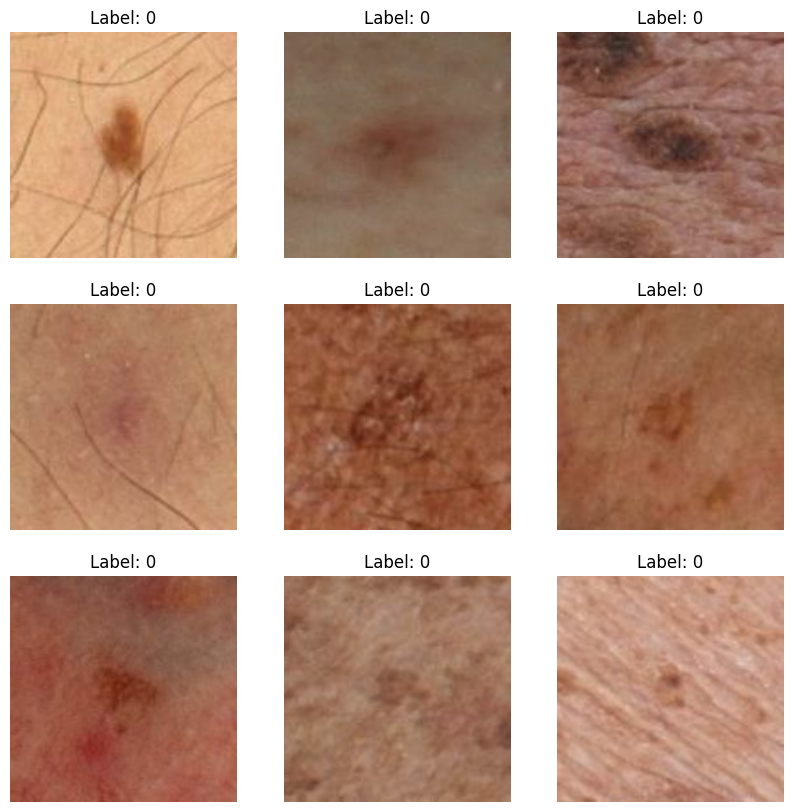

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_dir = '/content/drive/My Drive/Final project/data/raw/train-image/image'
img_height, img_width = 224, 224
batch_size = 32

# 1. Load images and labels from directory (assuming you have images in the folder)
# If you want label mapping based on your metadata:
train_df = df_meta[['isic_id', 'target']]
train_df['file_path'] = train_df['isic_id'].apply(lambda x: f"{data_dir}/{x}.jpg")
image_paths = train_df['file_path'].tolist()
image_labels = train_df['target'].tolist()

# 2. Create a TensorFlow dataset from file paths and labels
def process_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

path_ds = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
img_ds = path_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)

# 3. Add augmentation for training (random flip, rotation, zoom)
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    return image, label

aug_ds = img_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

# 4. Batch and prefetch for efficiency
train_ds = aug_ds.shuffle(1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# For validation you can skip augmentation:
valid_ds = img_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# 5. Preview a batch (optional)
for images, labels in train_ds.take(1):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


In [ ]:
import os

base_dir = '/content/drive/My Drive/Final project'
folders = ['data/raw', 'data/processed', 'models', 'results']

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)


In [ ]:
processed_path = '/content/drive/My Drive/Final project/data/processed/cleaned_metadata.csv'
df_meta.to_csv(processed_path, index=False)
print(f"Cleaned metadata saved to {processed_path}")


Cleaned metadata saved to /content/drive/My Drive/Final project/data/processed/cleaned_metadata.csv


#### 2.1 Train / Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_meta is your cleaned DataFrame
train_meta, valid_meta = train_test_split(
    df_meta,
    test_size=0.2,
    stratify=df_meta['target'],
    random_state=42
)

print(f"Training samples: {train_meta.shape[0]}, Validation samples: {valid_meta.shape[0]}")

# Save splits for reproducibility
train_meta.to_csv('/content/drive/My Drive/Final project/data/processed/train_metadata.csv', index=False)
valid_meta.to_csv('/content/drive/My Drive/Final project/data/processed/valid_metadata.csv', index=False)


Training samples: 320847, Validation samples: 80212


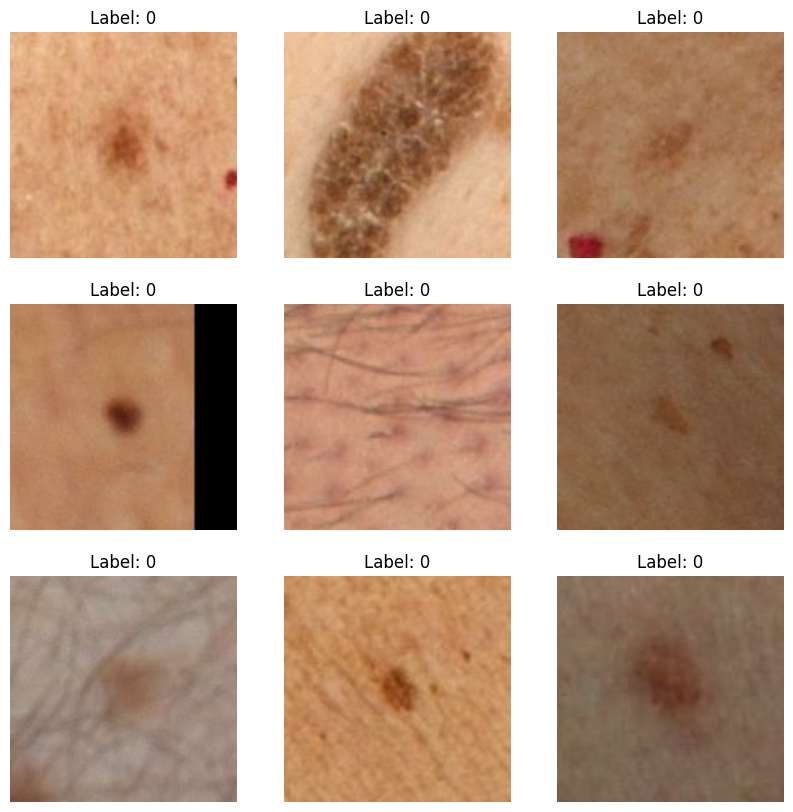

In [ ]:
import tensorflow as tf

img_height, img_width = 224, 224
batch_size = 32

# Base folder where actual image files reside (adjust path if needed)
image_dir = '/content/drive/My Drive/Final project/data/raw/train-image/image'

def create_dataset(df, augment=False):
    file_paths = df['isic_id'].apply(lambda x: f"{image_dir}/{x}.jpg").tolist()
    labels = df['target'].tolist()

    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

    def load_image(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [img_height, img_width])
        img = img / 255.0  # normalize to [0,1]
        return img, label

    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    if augment:
        def augment_fn(image, label):
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, max_delta=0.1)
            return image, label
        dataset = dataset.map(augment_fn, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.shuffle(1000)

    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create datasets
train_ds = create_dataset(train_meta, augment=True)
valid_ds = create_dataset(valid_meta, augment=False)

# Test: preview one batch
for images, labels in train_ds.take(1):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.show()


### 5. Baseline CNN Model

In [ ]:
# ============================================================================
# BLOCK 1: IMPORTS AND SETUP
# ============================================================================

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import json
import pickle

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create directories
os.makedirs('/content/models', exist_ok=True)
os.makedirs('/content/results', exist_ok=True)
os.makedirs('/content/data', exist_ok=True)

# Copy metadata to local (faster access)
!cp /content/drive/MyDrive/ISIC2024/data/raw/train-metadata.csv /content/data/

print("✅ Setup complete!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Setup complete!


In [ ]:
# ============================================================================
# BLOCK 2: HELPER FUNCTIONS
# ============================================================================

def balance_dataset(train_df, strategy='undersample', ratio=20):
    """Balance the dataset"""
    print("\n" + "=" * 60)
    print("CLASS BALANCING")
    print("=" * 60)

    df_majority = train_df[train_df['target'] == 0]
    df_minority = train_df[train_df['target'] == 1]

    print(f"\nOriginal distribution:")
    print(f"  Class 0 (benign): {len(df_majority):,}")
    print(f"  Class 1 (malignant): {len(df_minority):,}")
    print(f"  Imbalance ratio: {len(df_majority)/len(df_minority):.1f}:1")

    if strategy == 'undersample':
        n_samples = len(df_minority) * ratio
        df_majority_resampled = resample(
            df_majority, replace=False, n_samples=n_samples, random_state=42
        )
        df_balanced = pd.concat([df_majority_resampled, df_minority])

    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"\nBalanced distribution:")
    print(f"  Class 0 (benign): {len(df_balanced[df_balanced['target']==0]):,}")
    print(f"  Class 1 (malignant): {len(df_balanced[df_balanced['target']==1]):,}")
    print(f"  New ratio: {len(df_balanced[df_balanced['target']==0])/len(df_balanced[df_balanced['target']==1]):.1f}:1")

    return df_balanced


def preprocess_metadata(train_df):
    """Preprocess metadata features"""
    print("=" * 60)
    print("METADATA PREPROCESSING")
    print("=" * 60)

    df = train_df.copy()

    print("\n1. Encoding categorical variables...")

    # Sex
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df.loc[df['sex'].isna(), 'sex'] = 0.5

    # One-hot encoding
    anatom_dummies = pd.get_dummies(df['anatom_site_general'], prefix='anatom', dummy_na=True)
    df = pd.concat([df, anatom_dummies], axis=1)

    image_type_dummies = pd.get_dummies(df['image_type'], prefix='img_type', dummy_na=True)
    df = pd.concat([df, image_type_dummies], axis=1)

    tbp_type_dummies = pd.get_dummies(df['tbp_tile_type'], prefix='tbp_type', dummy_na=True)
    df = pd.concat([df, tbp_type_dummies], axis=1)

    print(f"   ✓ Categorical variables encoded")

    print("\n2. Processing numerical features...")

    numerical_features = [
        'age_approx', 'clin_size_long_diam_mm',
        'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
        'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext',
        'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
        'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
        'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL',
        'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity',
        'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
        'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
        'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
        'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
        'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z',
        'tbp_lv_dnn_lesion_confidence'
    ]

    numerical_features = [f for f in numerical_features if f in df.columns]

    imputer = SimpleImputer(strategy='median')
    df[numerical_features] = imputer.fit_transform(df[numerical_features])

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    print(f"   ✓ {len(numerical_features)} numerical features imputed and scaled")

    metadata_features = numerical_features + list(anatom_dummies.columns) + \
                       list(image_type_dummies.columns) + list(tbp_type_dummies.columns) + ['sex']

    print(f"\n✓ Total metadata features: {len(metadata_features)}")

    return df, metadata_features, scaler, imputer


def create_image_augmentation():
    """Create image augmentation pipeline"""
    train_augmentation = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.15,
        shear_range=0.1,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    val_augmentation = ImageDataGenerator(rescale=1./255)

    return train_augmentation, val_augmentation


def get_class_weights(y_train):
    """Calculate class weights"""
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    print("\n" + "=" * 60)
    print("CLASS WEIGHTS")
    print("=" * 60)
    print(f"Class 0 weight: {class_weight_dict[0]:.4f}")
    print(f"Class 1 weight: {class_weight_dict[1]:.4f}")

    return class_weight_dict

print("✅ Helper functions defined!")


✅ Helper functions defined!


In [ ]:
# ============================================================================
# BLOCK 3: DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 60)
print("STARTING DATA PREPROCESSING")
print("=" * 60)

# Load data
train_df = pd.read_csv('/content/data/train-metadata.csv')
base_dir = '/content/drive/MyDrive/ISIC2024/data/raw/'

# Find image directory
print("\n🔍 Searching for image directory...")
possible_dirs = [
    base_dir + 'train-image/image/',
    base_dir + 'train-image/',
    base_dir + 'train/',
    base_dir
]

image_dir = None
for d in possible_dirs:
    if os.path.exists(d):
        files = os.listdir(d)
        jpg_files = [f for f in files if f.endswith('.jpg') and f.startswith('ISIC_')]
        if len(jpg_files) > 0:
            image_dir = d
            print(f"✓ Found {len(jpg_files)} images in: {d}")
            break

if image_dir is None:
    raise ValueError("Could not find image directory!")

# Balance dataset
train_df_balanced = balance_dataset(train_df, strategy='undersample', ratio=20)

# Preprocess metadata
train_df_processed, metadata_features, scaler, imputer = preprocess_metadata(train_df_balanced)

# Convert target to string and create filename column
train_df_processed['target'] = train_df_processed['target'].astype(str)
train_df_processed['filename'] = train_df_processed['isic_id'] + '.jpg'

# Verify images
print("\n🔍 Verifying sample images...")
sample_ids = train_df_processed['isic_id'].head(5).values
found = sum([os.path.exists(os.path.join(image_dir, f"{img_id}.jpg")) for img_id in sample_ids])
print(f"✓ Found {found}/5 sample images")

# Split train/val
train_df_split, val_df = train_test_split(
    train_df_processed,
    test_size=0.2,
    stratify=train_df_processed['target'],
    random_state=42
)

print(f"\n✓ Train set: {len(train_df_split)} samples")
print(f"✓ Validation set: {len(val_df)} samples")

# Create image generators
train_datagen, val_datagen = create_image_augmentation()

train_generator = train_datagen.flow_from_dataframe(
    train_df_split,
    directory=image_dir,
    x_col='filename',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='filename',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Calculate class weights
train_df_numeric = train_df_split.copy()
train_df_numeric['target'] = train_df_numeric['target'].astype(int)
class_weights = get_class_weights(train_df_numeric['target'].values)

print("\n" + "=" * 60)
print("PREPROCESSING COMPLETE!")
print("=" * 60)
print(f"✓ Train batches: {len(train_generator)}")
print(f"✓ Val batches: {len(val_generator)}")

# Test batch loading
test_batch_x, test_batch_y = next(train_generator)
print(f"\n🧪 Test batch loaded: {test_batch_x.shape}")

print("\n✅ Ready for training!")



STARTING DATA PREPROCESSING


/tmp/ipython-input-1359288509.py:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/data/train-metadata.csv')



🔍 Searching for image directory...
✓ Found 401059 images in: /content/drive/MyDrive/ISIC2024/data/raw/train-image/image/

CLASS BALANCING

Original distribution:
  Class 0 (benign): 400,666
  Class 1 (malignant): 393
  Imbalance ratio: 1019.5:1

Balanced distribution:
  Class 0 (benign): 7,860
  Class 1 (malignant): 393
  New ratio: 20.0:1
METADATA PREPROCESSING

1. Encoding categorical variables...
   ✓ Categorical variables encoded

2. Processing numerical features...
   ✓ 35 numerical features imputed and scaled

✓ Total metadata features: 47

🔍 Verifying sample images...
✓ Found 5/5 sample images

✓ Train set: 6602 samples
✓ Validation set: 1651 samples
Found 6602 validated image filenames belonging to 2 classes.
Found 1651 validated image filenames belonging to 2 classes.

CLASS WEIGHTS
Class 0 weight: 0.5250
Class 1 weight: 10.5127

PREPROCESSING COMPLETE!
✓ Train batches: 207
✓ Val batches: 52

🧪 Test batch loaded: (32, 224, 224, 3)

✅ Ready for training!


In [ ]:
# ============================================================================
# BLOCK 4: BUILD MODEL
# ============================================================================

print("\n" + "=" * 60)
print("BUILDING EFFICIENTNETB0 MODEL")
print("=" * 60)

# Load pre-trained EfficientNetB0
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False

# Build top layers
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4, name='dropout_1')(x)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.4, name='dropout_2')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dropout(0.3, name='dropout_3')(x)
predictions = Dense(2, activation='softmax', name='predictions')(x)

model = Model(inputs=base_model.input, outputs=predictions)

print(f"\n✓ Model built:")
print(f"   - Base: EfficientNetB0 (frozen)")
print(f"   - Total parameters: {model.count_params():,}")

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("✓ Model compiled!")

# Setup callbacks
callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=5,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        '/content/models/efficientnet_best.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_auc',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        mode='max',
        verbose=1
    )
]

print("✓ Callbacks configured!")
print("\n✅ Ready to train!")



BUILDING EFFICIENTNETB0 MODEL
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

✓ Model built:
   - Base: EfficientNetB0 (frozen)
   - Total parameters: 4,410,661
✓ Model compiled!
✓ Callbacks configured!

✅ Ready to train!


In [ ]:
# ============================================================================
# BLOCK 5: TRAIN MODEL - THIS TAKES 2-3 HOURS
# ============================================================================

print("\n" + "=" * 60)
print("🚀 STARTING TRAINING - EFFICIENTNETB0")
print("=" * 60)
print(f"Start time: {time.strftime('%I:%M:%S %p')}")
print(f"Expected duration: 2-3 hours")
print(f"Training samples: {len(train_df_split)}")
print(f"Validation samples: {len(val_df)}")
print("=" * 60)
print("\n💤 You can go to sleep now - model will train overnight!")
print("=" * 60)

start_time = time.time()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

training_time = (time.time() - start_time) / 60

print("\n" + "=" * 60)
print("🎉 TRAINING COMPLETE!")
print("=" * 60)
print(f"Total time: {training_time:.1f} minutes ({training_time/60:.2f} hours)")
print(f"End time: {time.strftime('%I:%M:%S %p')}")



🚀 STARTING TRAINING - EFFICIENTNETB0
Start time: 04:24:01 AM
Expected duration: 2-3 hours
Training samples: 6602
Validation samples: 1651

💤 You can go to sleep now - model will train overnight!


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6487 - auc: 0.6939 - loss: 0.7537 - precision: 0.6487 - recall: 0.6487
Epoch 1: val_auc improved from -inf to 0.04785, saving model to /content/models/efficientnet_best.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.6482 - auc: 0.6933 - loss: 0.7536 - precision: 0.6482 - recall: 0.6482 - val_accuracy: 0.0478 - val_auc: 0.0478 - val_loss: 0.7858 - val_precision: 0.0478 - val_recall: 0.0478 - learning_rate: 1.0000e-04
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.5660 - auc: 0.5922 - loss: 0.7159 - precision: 0.5660 - recall: 0.5660
Epoch 2: val_auc did not improve from 0.04785
207/207 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5660 - auc: 0.5923 - loss: 0.7159 - precision: 0.5660 - recall: 0.5660 - val_accuracy: 0.0478 - val_auc: 0.0478 - val_loss: 0.8238 - val_precision: 0.0478 - val_recall: 0.0478 - learning_rate: 1.0000e-04
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.4476 - auc: 0.4232 - loss: 0.7257 - precision: 0.4476 - recall: 0.4476
Epoch 3: val_auc improved from 0.04785 to 0.95215, saving model to /content/models/efficientnet_best.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.4478 - auc: 0.4234 - loss: 0.7256 - precision: 0.4478 - recall: 0.4478 - val_accuracy: 0.9522 - val_auc: 0.9522 - val_loss: 0.6325 - val_precision: 0.9522 - val_recall: 0.9522 - learning_rate: 1.0000e-04
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.6402 - auc: 0.6929 - loss: 0.6883 - precision: 0.6402 - recall: 0.6402
Epoch 4: val_auc did not improve from 0.95215
207/207 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.6398 - auc: 0.6924 - loss: 0.6884 - precision: 0.6398 - recall: 0.6398 - val_accuracy: 0.9522 - val_auc: 0.9522 - val_loss: 0.6721 - val_precision: 0.9522 - val_recall: 0.9522 - learning_rate: 1.0000e-04
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.5400 - auc: 0.5658 - loss: 0.7248 - precision: 0.5400 - recall: 0.5400
Epoch 5: val_auc did not improve from 0.95215
207/207 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5398 - auc: 0.5656 - loss: 0.7247 - precision: 0.5398 

207/207 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5894 - auc: 0.6197 - loss: 0.6974 - precision: 0.5894 - recall: 0.5894 - val_accuracy: 0.9522 - val_auc: 0.9522 - val_loss: 0.6802 - val_precision: 0.9522 - val_recall: 0.9522 - learning_rate: 5.0000e-05
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5785 - auc: 0.6088 - loss: 0.6924 - precision: 0.5785 - recall: 0.5785
Epoch 8: val_auc did not improve from 0.95218
207/207 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.5783 - auc: 0.6087 - loss: 0.6924 - precision: 0.5783 - recall: 0.5783 - val_accuracy: 0.0478 - val_auc: 0.0478 - val_loss: 0.7114 - val_precision: 0.0478 - val_recall: 0.0478 - learning_rate: 5.0000e-05
Epoch 9/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4693 - auc: 0.4511 - loss: 0.7312 - precision: 0.4693 - recall: 0.4693
Epoch 9: val_auc did not improve from 0.95218

Epoch 9: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
207/207 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/st


EVALUATION METRICS

🏆 BEST RESULTS (Epoch 7):
   Validation AUC:       0.9522
   Validation Accuracy:  0.9522
   Validation Precision: 0.9522
   Validation Recall:    0.9522


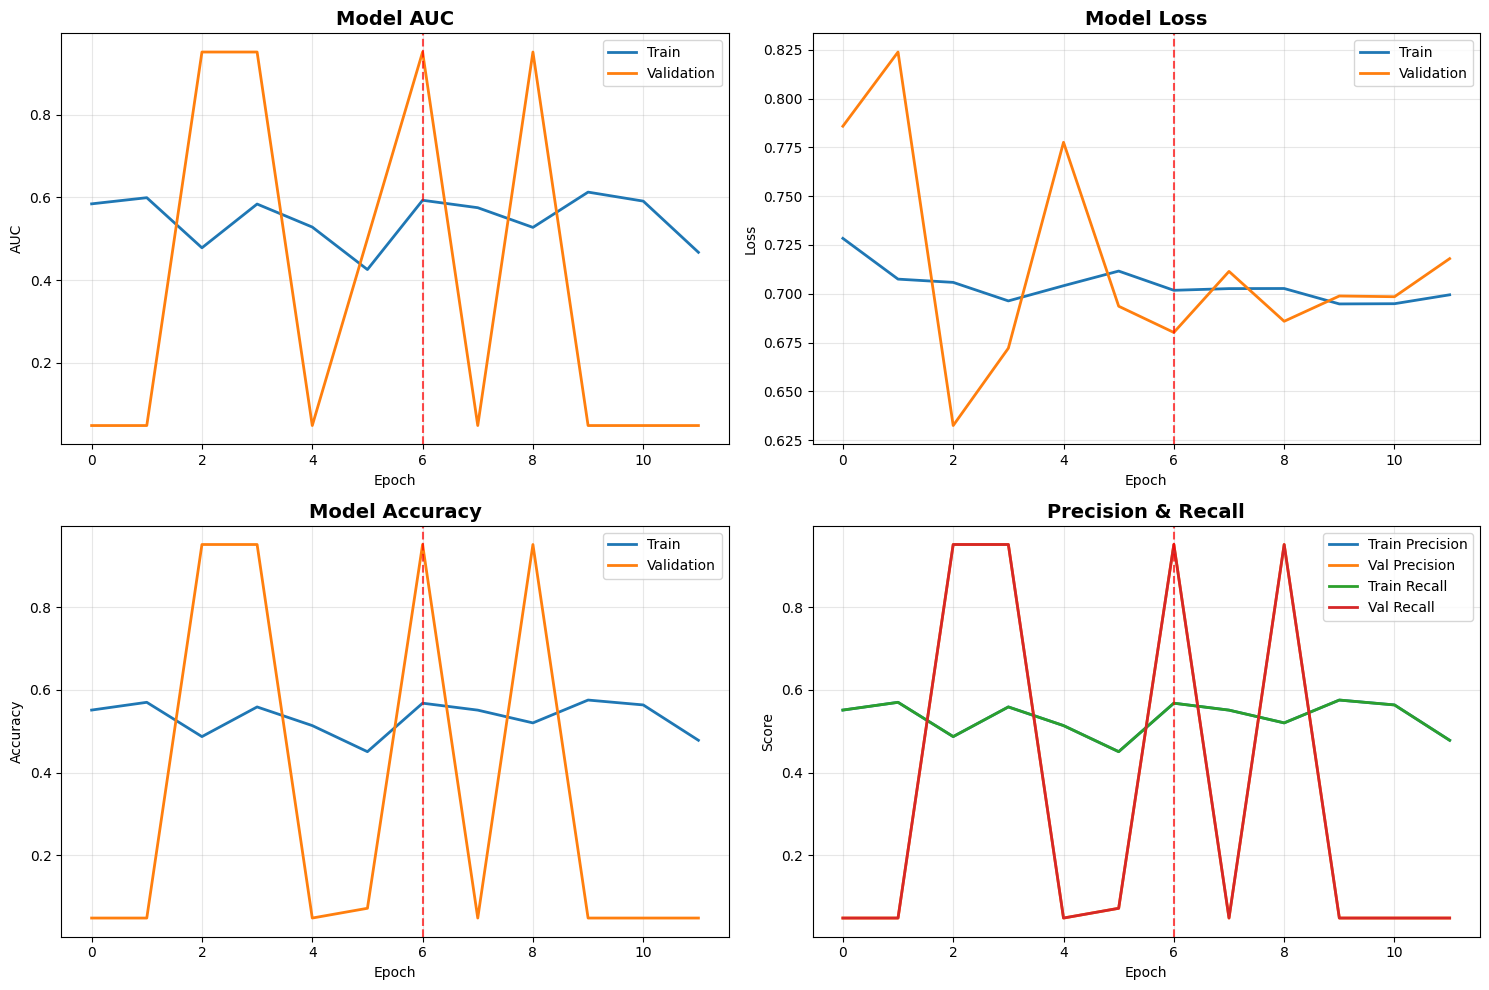


✅ EVERYTHING SAVED!

📁 Files saved to:
   /content/models/efficientnet_best.h5
   /content/results/efficientnet_training_curves.png
   /content/results/efficientnet_results.json

💾 Also backed up to Google Drive!

🎯 WEEK 1 TARGET: AUC ≥ 0.75
🏆 YOUR RESULT: AUC = 0.9522
✅ TARGET MET! WEEK 1 COMPLETE!


In [ ]:
# ============================================================================
# BLOCK 6: EVALUATE AND SAVE RESULTS
# ============================================================================

print("\n" + "=" * 60)
print("EVALUATION METRICS")
print("=" * 60)

# Get best metrics
best_epoch = np.argmax(history.history['val_auc'])
best_val_auc = history.history['val_auc'][best_epoch]
best_val_acc = history.history['val_accuracy'][best_epoch]
best_val_precision = history.history['val_precision'][best_epoch]
best_val_recall = history.history['val_recall'][best_epoch]

print(f"\n🏆 BEST RESULTS (Epoch {best_epoch + 1}):")
print(f"   Validation AUC:       {best_val_auc:.4f}")
print(f"   Validation Accuracy:  {best_val_acc:.4f}")
print(f"   Validation Precision: {best_val_precision:.4f}")
print(f"   Validation Recall:    {best_val_recall:.4f}")

# Plot training curves
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# AUC
axes[0, 0].plot(history.history['auc'], label='Train', linewidth=2)
axes[0, 0].plot(history.history['val_auc'], label='Validation', linewidth=2)
axes[0, 0].axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Model AUC', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('AUC')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(history.history['loss'], label='Train', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Validation', linewidth=2)
axes[0, 1].axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Accuracy
axes[1, 0].plot(history.history['accuracy'], label='Train', linewidth=2)
axes[1, 0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
axes[1, 0].axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Precision & Recall
axes[1, 1].plot(history.history['precision'], label='Train Precision', linewidth=2)
axes[1, 1].plot(history.history['val_precision'], label='Val Precision', linewidth=2)
axes[1, 1].plot(history.history['recall'], label='Train Recall', linewidth=2)
axes[1, 1].plot(history.history['val_recall'], label='Val Recall', linewidth=2)
axes[1, 1].axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
axes[1, 1].set_title('Precision & Recall', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/results/efficientnet_training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# Save results
results_log = {
    'Model': 'EfficientNetB0',
    'Date': time.strftime('%Y-%m-%d %H:%M'),
    'Training_Time_Minutes': round(training_time, 1),
    'Best_Epoch': int(best_epoch + 1),
    'Val_AUC': float(best_val_auc),
    'Val_Accuracy': float(best_val_acc),
    'Val_Precision': float(best_val_precision),
    'Val_Recall': float(best_val_recall),
    'Train_Samples': len(train_df_split),
    'Val_Samples': len(val_df),
    'Class_Ratio': '20:1',
    'Image_Size': '224x224',
    'Batch_Size': 32,
    'Learning_Rate': '1e-4'
}

with open('/content/results/efficientnet_results.json', 'w') as f:
    json.dump(results_log, f, indent=4)

# Save history
with open('/content/models/efficientnet_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Backup to Drive
import shutil
shutil.copy('/content/models/efficientnet_best.h5',
            '/content/drive/MyDrive/ISIC2024/models/efficientnet_best.h5')
shutil.copy('/content/results/efficientnet_training_curves.png',
            '/content/drive/MyDrive/ISIC2024/results/efficientnet_training_curves.png')
shutil.copy('/content/results/efficientnet_results.json',
            '/content/drive/MyDrive/ISIC2024/results/efficientnet_results.json')

print("\n" + "=" * 60)
print("✅ EVERYTHING SAVED!")
print("=" * 60)
print(f"\n📁 Files saved to:")
print(f"   /content/models/efficientnet_best.h5")
print(f"   /content/results/efficientnet_training_curves.png")
print(f"   /content/results/efficientnet_results.json")
print(f"\n💾 Also backed up to Google Drive!")

print(f"\n🎯 WEEK 1 TARGET: AUC ≥ 0.75")
print(f"🏆 YOUR RESULT: AUC = {best_val_auc:.4f}")
if best_val_auc >= 0.75:
    print("✅ TARGET MET! WEEK 1 COMPLETE!")
else:
    print("⚠️ Close! May need fine-tuning tomorrow.")


In [ ]:
# ============================================================================
# BLOCK 7: DOWNLOAD FILES TO LOCAL COMPUTER
# ============================================================================

from google.colab import files

print("📥 Downloading files to your local computer...")
print("(Browser will prompt you to save each file)")

files.download('/content/models/efficientnet_best.h5')
files.download('/content/models/efficientnet_history.pkl')
files.download('/content/results/efficientnet_training_curves.png')
files.download('/content/results/efficientnet_results.json')

print("\n✅ All files downloaded!")
print("\n💡 Files are also backed up in your Google Drive at:")
print("   /content/drive/MyDrive/ISIC2024/models/")
print("   /content/drive/MyDrive/ISIC2024/results/")


📥 Downloading files to your local computer...
(Browser will prompt you to save each file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ All files downloaded!

💡 Files are also backed up in your Google Drive at:
   /content/drive/MyDrive/ISIC2024/models/
   /content/drive/MyDrive/ISIC2024/results/
